# Helmet Detection: How to run inference on the endpoint you have created?

In [2]:
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO
import requests
import numpy as np
import numpy as np
from PIL import Image
from PIL import ImageOps
from IPython.core.display import HTML
import io
import json


# HTML('<img src="https://pek-dbc2103.eng.vmware.com/juanl/helmet_detection/1.jpg" alt="Naxos_Taverna" style="height: 600px;"/>'
#      '<figcaption>helmet.jpg</figcaption>'
#      '<a href="https://en.wikipedia.org/wiki/GNU_Free_Documentation_License">License</a>')

### Query endpoint that you have created and parse the response

In [3]:
# Access fastrcnn by restful API
url="http://10.186.99.223:8080/predictions/helmet_detection"


image_path = './test_1.jpg'


def make_request(url, image_path):
    headers = {
        'Content-Type': 'image/jpeg'
    }
    
    with open(image_path, "rb") as image:
        f = image.read()
        payload = bytearray(f)
        
    response = requests.request("POST", url, headers=headers, data=payload)
    return json.loads(response.text)

detections = make_request(url, image_path)

print(detections)

[{'x1': 0.16830308735370636, 'y1': 0.36698096990585327, 'x2': 0.3356268107891083, 'y2': 0.5662754774093628, 'type': 'wcaqm', 'value': '1', 'conf': 0.9418923854827881, 'label': 'hat'}, {'x1': -0.00038470624713227153, 'y1': 0.26973700523376465, 'x2': 0.11975765228271484, 'y2': 0.5021408796310425, 'type': 'wcaqm', 'value': '1', 'conf': 0.9287041425704956, 'label': 'hat'}, {'x1': 0.31550225615501404, 'y1': 0.27130556106567383, 'x2': 0.4195330739021301, 'y2': 0.4244980812072754, 'type': 'wcaqm', 'value': '1', 'conf': 0.922441303730011, 'label': 'hat'}, {'x1': 0.8000054359436035, 'y1': 0.36035841703414917, 'x2': 0.8742903470993042, 'y2': 0.4628569483757019, 'type': 'wcaqm', 'value': '1', 'conf': 0.9012497067451477, 'label': 'hat'}, {'x1': 0.44192060828208923, 'y1': 0.39776062965393066, 'x2': 0.5190550088882446, 'y2': 0.48923078179359436, 'type': 'wcaqm', 'value': '1', 'conf': 0.8915992379188538, 'label': 'hat'}, {'x1': 0.9677120447158813, 'y1': 0.4071219861507416, 'x2': 0.9998529553413391, '

### Display model predictions as bounding boxes on the input image 

KeyError: 'class'

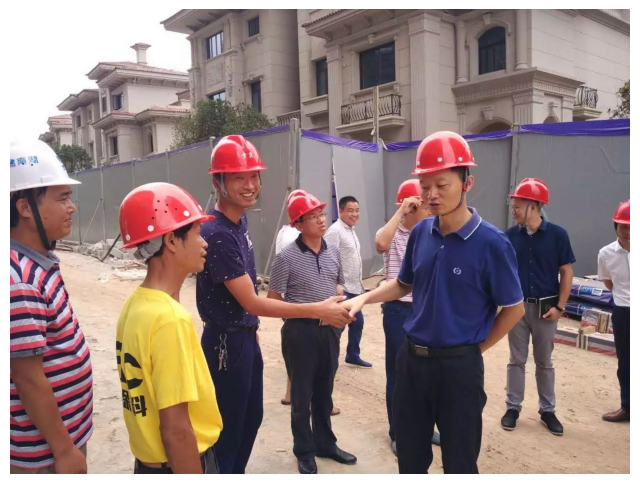

In [5]:
def load_image(image_path, figsize=(15, 15)):
    img = Image.open(image_path)
    return img


def visualize_detections(image_path, detections, figsize=(8, 8)):
    
    img = Image.open(image_path)
    plt.figure(figsize=figsize)
    plt.axis("off")
    plt.imshow(img)
 
    scoreArr, nameArr, boxArr = [], [], []
    
    for detection in detections:
        score = detection['conf']
        name = detection['label']  #class_names
        box = [detection['x1'], detection['y1'], detection['x2'], detection['y2']]      #boxes
        scoreArr.append(score)
        nameArr.append(name)
        boxArr.append(box)

    scoreArr, nameArr, boxArr = np.array(scoreArr), np.array(nameArr), np.array(boxArr)

    boxes, class_names, scores = boxArr, nameArr, scoreArr
    max_boxes, min_score = 18, 0.1
    score_split_w = 0.1  # 0.95~1.00 
    score_split_r = 0.1  #0.90~0.95 
    

    for i in range(min(boxes.shape[0], max_boxes)):
        if scores[i] >= min_score:
            xmin, ymin, xmax, ymax = tuple(boxes[i])
          
            ax = plt.gca()
            text = "{}: {:.2f}".format(class_names[i], (scores[i]))
            w, h = xmax - xmin, ymax - ymin
            xmin *= 1300
            ymin *= 1000
            w *= 1000
            h *= 800        
            
            if class_names[i] == 'person':
                patch = plt.Rectangle(
                  [xmin, ymin], w, h, fill=False, edgecolor='w', linewidth=3
              )
            else:
                patch = plt.Rectangle(
                [xmin, ymin], w, h, fill=False, edgecolor='c', linewidth=3
              )
         
        ax.add_patch(patch)
        
        if class_names[i] == 'person':
            ax.text(
                xmin,
                ymin,
                text,
                bbox={"facecolor": 'w', "alpha": 1.0},
                clip_box=ax.clipbox,
                clip_on=True,
            )
        else:
            ax.text(
                xmin,
                ymin,
                text,
                bbox={"facecolor": 'c', "alpha": 0.8},
                clip_box=ax.clipbox,
                clip_on=True,
            )
    

    plt.show()
    
    
visualize_detections(image_path, detections)